In [94]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.get_option("display.max_columns",122)

20

In [95]:
import warnings

warnings.filterwarnings('ignore')

In [96]:
pwd

'C:\\Users\\hp lapye\\Downloads\\EDA2'

In [97]:
# Reading dataset from local
df = pd.read_csv('application_data.csv')

In [98]:
#checking the first five records
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#checking the rows and columns
df.shape

(307511, 122)

In [100]:
#checking all the datatypes of all columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [101]:
#Checking the columns which have null values more than 35%
NA_col = df.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.45*len(df))]
len(NA_col)

49

In [102]:
#dropping those columns as mostly have more than 45% data as null values
EmptyCol=list(NA_col.index)
df.drop(labels=EmptyCol,axis=1,inplace=True)

In [103]:
#checking the shape of dataframe after dropping the columns
df.shape

(307511, 73)

In [104]:
#checking null values in each column
Null_Check=df.isnull().sum()/len(df)*100
Null_Check.sort_values(ascending=False).head(60)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

In [105]:
#Filling Occupation type values
df.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [106]:
#Imputation The null values of occupation can be filled with the mode value
df.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [107]:
#Imputation The null values of Credit Bureau can be filled with the mode value
df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [108]:
#Imputation The null values of Credit Bureau Week can be filled with the mode value
df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [109]:
#Imputation The null values of Credit Bureau Day can be filled with the mode value
df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [110]:
#Imputation The null values of Credit Bureau Hour can be filled with the mode value
df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [111]:
#Imputation The null values of Credit Bureau QRT can be filled with the mode value
df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [203]:
#For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903.0'
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [112]:
#Checking the datatypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [113]:
#checking the summary of Income columns
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [114]:
## Correcting the Data type error.

In [115]:
# For columns with Dates have negative number of days
print(df.DAYS_ID_PUBLISH.unique())                 
print(df.DAYS_REGISTRATION.unique())               
print(df.DAYS_EMPLOYED.unique())                   
print(df.DAYS_BIRTH.unique())                      

[-2120  -291 -2531 ... -6194 -5854 -6211]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]


In [116]:
#Fetching the columns with negative values in it
filter_col = [col for col in df if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [117]:
#Making the values positve 
df[filter_col] = abs(df[filter_col])

In [118]:
# For columns with Dates have negative number of days
print(df.DAYS_ID_PUBLISH.unique())                 
print(df.DAYS_REGISTRATION.unique())               
print(df.DAYS_EMPLOYED.unique())                   
print(df.DAYS_BIRTH.unique())                      

[2120.  291. 2531. ... 6194. 5854. 6211.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 9461. 16765. 19046. ...  7951.  7857. 25061.]


In [119]:
#Now checking if the summary of days columns is negative
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [120]:
#Checking the CODE_GENDER values have XNA values in it
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [121]:
#Replacing the XNA values with F ie the mode
df.loc[df.CODE_GENDER=='XNA','CODE_GENDER'] = 'F'
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [198]:
#Checking the occupation values if XNA exists
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [199]:
#Checking the organization type
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [ ]:
#Binning the values

In [126]:
#checking the percentiles
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [127]:
#Binning the Income values to range in 'VERY_LOW','LOW','MEDIUM','HIGH','VERY HIGH'
df['AMT_INCOME_RANGE'] = pd.qcut(df['AMT_INCOME_TOTAL'],q=[0,0.2,0.5,0.8,0.95,1], labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY HIGH'])
df['AMT_INCOME_RANGE']

0           MEDIUM
1             HIGH
2         VERY_LOW
3              LOW
4              LOW
            ...   
307506      MEDIUM
307507    VERY_LOW
307508      MEDIUM
307509      MEDIUM
307510      MEDIUM
Name: AMT_INCOME_RANGE, Length: 307511, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']

In [128]:
#Binning the Amount Credit values to range in 'VERY_LOW','LOW','MEDIUM','HIGH','VERY HIGH'
df['AMT_CREDIT_RANGE'] = pd.qcut(df['AMT_CREDIT'],q=[0,0.2,0.5,0.8,0.95,1], labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY HIGH'])
df['AMT_CREDIT_RANGE']

0              LOW
1             HIGH
2         VERY_LOW
3              LOW
4              LOW
            ...   
307506    VERY_LOW
307507         LOW
307508      MEDIUM
307509         LOW
307510      MEDIUM
Name: AMT_CREDIT_RANGE, Length: 307511, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']

In [129]:
#Binning the Days Birth into 'Very_Young','Young', 'Middle_Age', 'Senior_Citizen'
#Converting the days into year
df['DAYS_BIRTH'] = (df['DAYS_BIRTH']/365).astype(int)

In [130]:
#checking the first five rows
df['DAYS_BIRTH'].head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int32

In [131]:
#checking the unique values to find the smallest and largest value to range
df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [132]:
#Binning
df['BIRTH_DATE_RANGE'] = pd.cut(df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [133]:
#Checking after binning new column BIRTH_DATE_RANGE
df['BIRTH_DATE_RANGE'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: BIRTH_DATE_RANGE, dtype: int64

# Finding Outliers

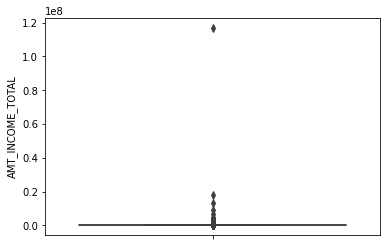

In [135]:
sns.boxplot(y=df['AMT_INCOME_TOTAL'])
plt.show()

#### Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client. We observe a value around 120M which is surely an outlier.

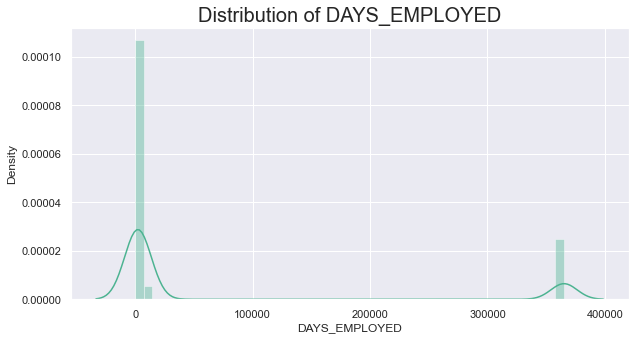

In [276]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df['DAYS_EMPLOYED'], color="#4CB391" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()



#### We observe a value which is greater that 20,000 which is surely an outlier because 
#### 25,000/365 will be around 54 years. Considering that a person started working at age of 21, 
#### the person will be 21+54 will turn out to be 75 years old.

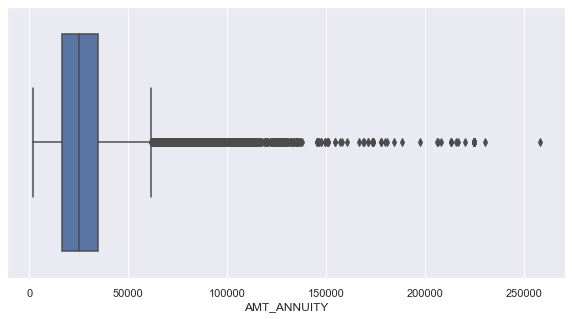

In [206]:
plt.figure(figsize=(10,5))
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

#### Here the value greater than 250000 is outlier

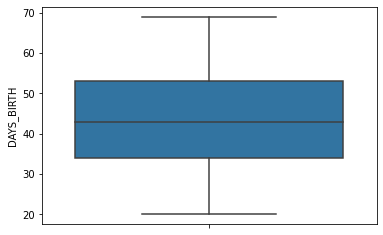

In [137]:
sns.boxplot(y=df['DAYS_BIRTH'])
plt.show()

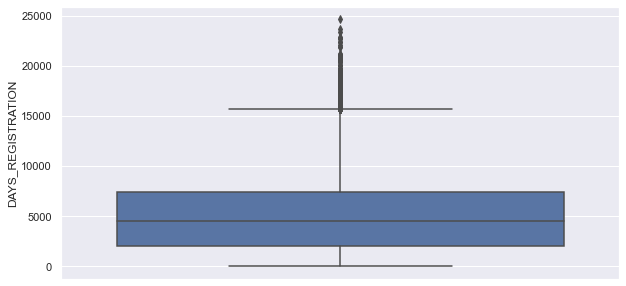

In [209]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['DAYS_REGISTRATION'])
plt.show()

##### No outlier as such

## checking the imbalance between deafaulters and others

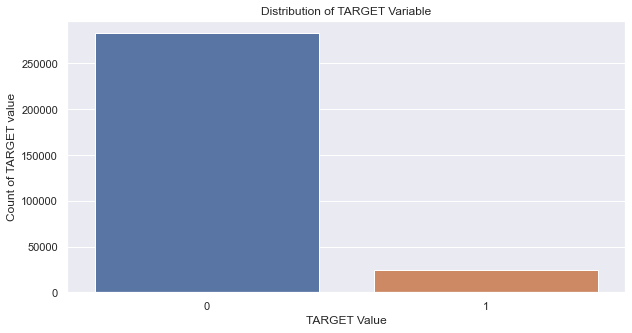

In [212]:
plt.figure(figsize=(10,5))
sns.countplot(df['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

### The data is highly imbalance as the count of defaulters is less than 50000 and others 250000 

In [235]:
# Dividing the dataframe into 2 different dataframes with df_0 having defaulters and df_1 with others
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

In [236]:
#Checking the dataframe 
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,BIRTH_DATE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,VERY_LOW,VERY_LOW,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,LOW,LOW,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,LOW,LOW,Middle_Age
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0.0,0.0,0.0,0.0,1.0,1.0,VERY_LOW,LOW,Middle_Age


In [239]:
#Checking the shape of 2nd dataframe
df_1.shape

(24825, 76)

## Univariate Categorical Analysis

Text(0.5, 1.0, 'Distribution of Gender among Loan Payment Difficulties')

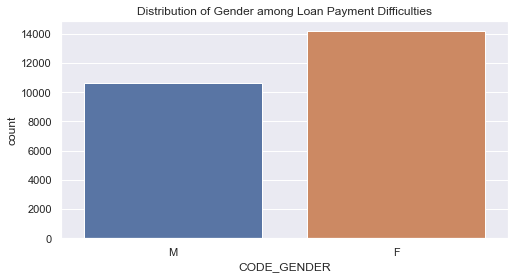

In [240]:
#Checking the gender distribution among the defaulters 
plt.figure(figsize=(8,4))
sns.countplot(x=df_1['CODE_GENDER'])
plt.title("Distribution of Gender among Loan Payment Difficulties")


Text(0.5, 1.0, 'Distribution of Gender among Loan Non-Payment Difficulties')

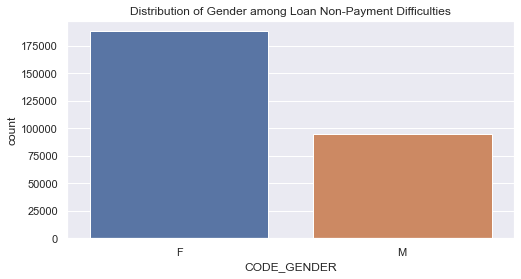

In [241]:
#Checking the gender distribution among the Non-defaulters 
plt.figure(figsize=(8,4))
sns.countplot(x=df_0['CODE_GENDER'])
plt.title("Distribution of Gender among Loan Non-Payment Difficulties")


#### Comparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties

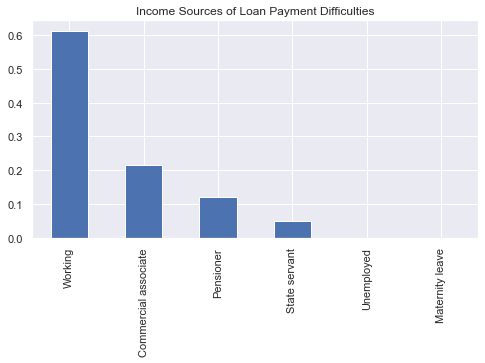

In [242]:
plt.figure(figsize=(8,4))
plt.title("Income Sources of Loan Payment Difficulties")
ax= df_1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()


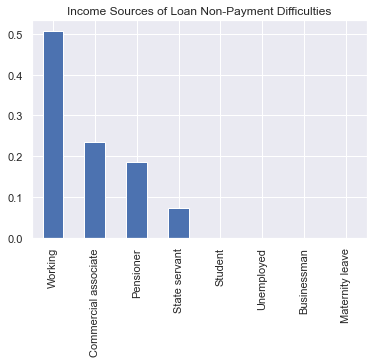

In [243]:
plt.figure(figsize=(6,4))
plt.title("Income Sources of Loan Non-Payment Difficulties")
ax= df_0['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Working professionals are prominent in both Loan Payment difficulties and Loan Non-Payment Difficulties. While there is decrease in percentage of pensioner in Loan Payment difficulties 

In [147]:
#Family Status

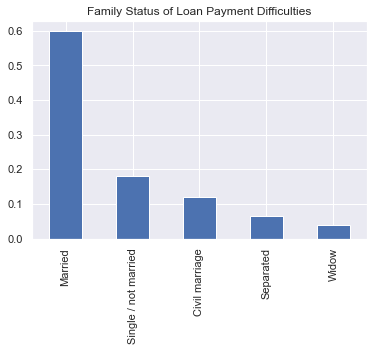

In [245]:
plt.figure(figsize=(6,4))
plt.title("Family Status of Loan Payment Difficulties")
ax= df_1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

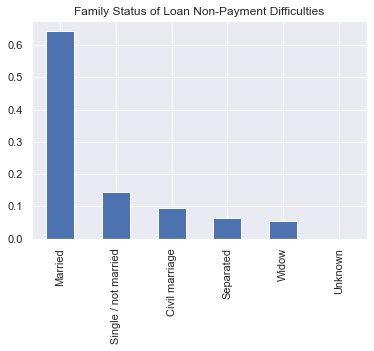

In [246]:
plt.figure(figsize=(6,4))
plt.title("Family Status of Loan Non-Payment Difficulties")
ax = df_0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties

In [150]:
# Education

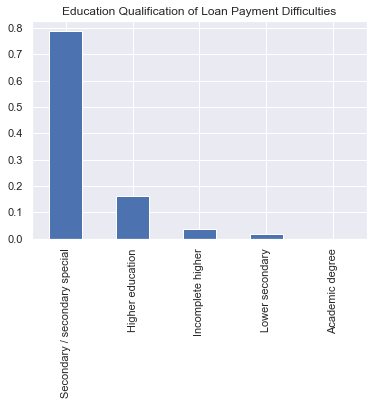

In [248]:
plt.figure(figsize=(6,4))
plt.title("Education Qualification of Loan Payment Difficulties")
ax= df_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

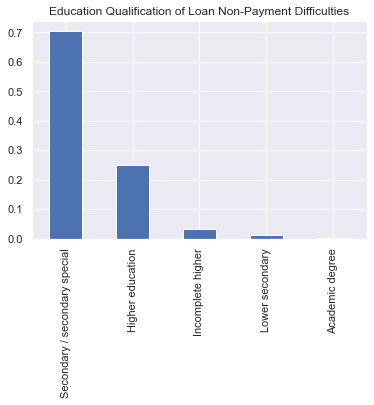

In [249]:
plt.figure(figsize=(6,4))
plt.title("Education Qualification of Loan Non-Payment Difficulties")
ax= df_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [153]:
#House Type

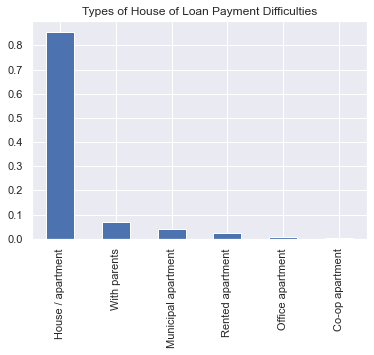

In [251]:
plt.figure(figsize=(6,4))
plt.title("Types of House of Loan Payment Difficulties")
ax= df_1['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

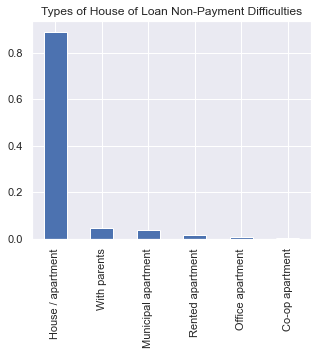

In [277]:
plt.figure(figsize=(5,4))
plt.title("Types of House of Loan Non-Payment Difficulties")
ax= df_0['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

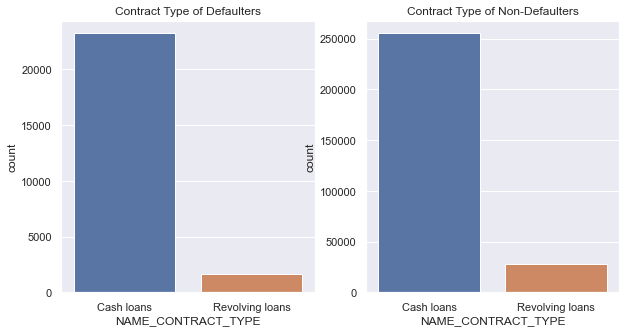

In [253]:
#Contract Type
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_1)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_0)
plt.title('Contract Type of Non-Defaulters')

plt.show()

#### We observe there is increase in both the Cash and Revolving loans in loan Non-Payment Difficulties

In [159]:
#Accompanied By

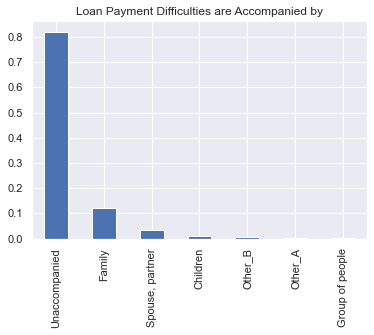

In [254]:
plt.figure(figsize=(6,4))
plt.title("Loan Payment Difficulties are Accompanied by")
ax= df_1['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

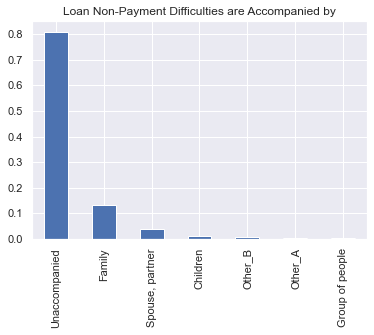

In [255]:
plt.figure(figsize=(6,4))
plt.title("Loan Non-Payment Difficulties are Accompanied by")
ax= df_0['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We Do not observe any major changes

In [162]:
#Organization Type

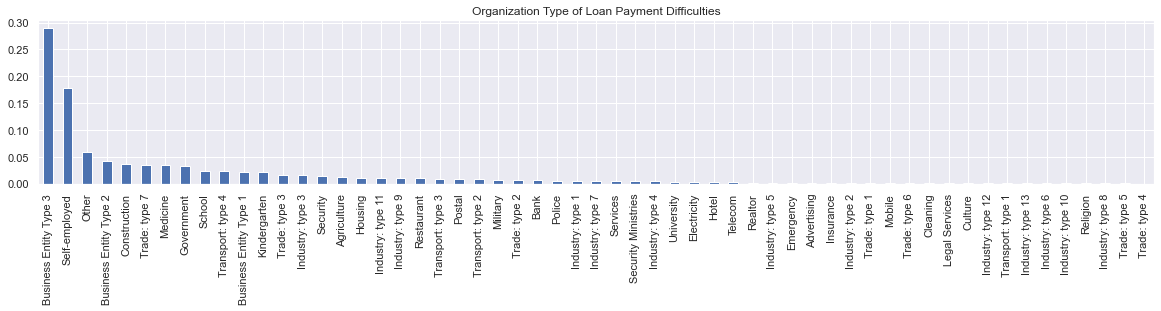

In [256]:
plt.figure(figsize=(20, 3))
plt.title("Organization Type of Loan Payment Difficulties")
ax= df_1['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

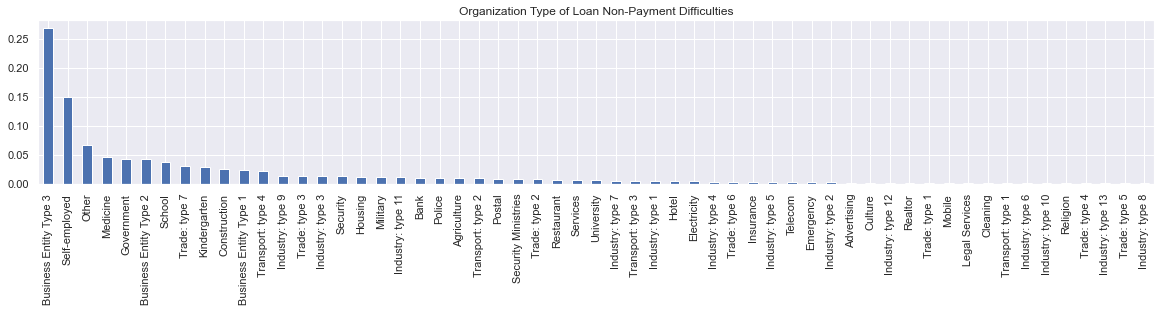

In [257]:
plt.figure(figsize=(20, 3))
plt.title("Organization Type of Loan Non-Payment Difficulties")
ax= df_0['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Self Employeed and Business Entity Type percentage is more in Defaulters as compared to Loan Non-Payment Difficulties

In [165]:
#OCCUPATION TYPE

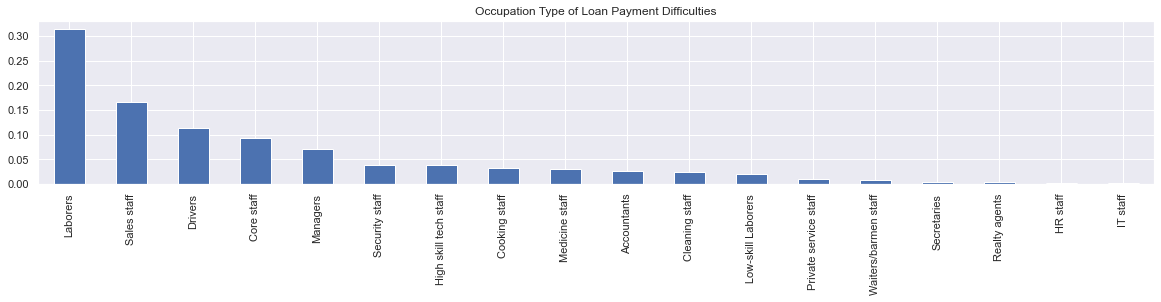

In [258]:
plt.figure(figsize=(20, 3))
plt.title("Occupation Type of Loan Payment Difficulties")
ax= df_1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

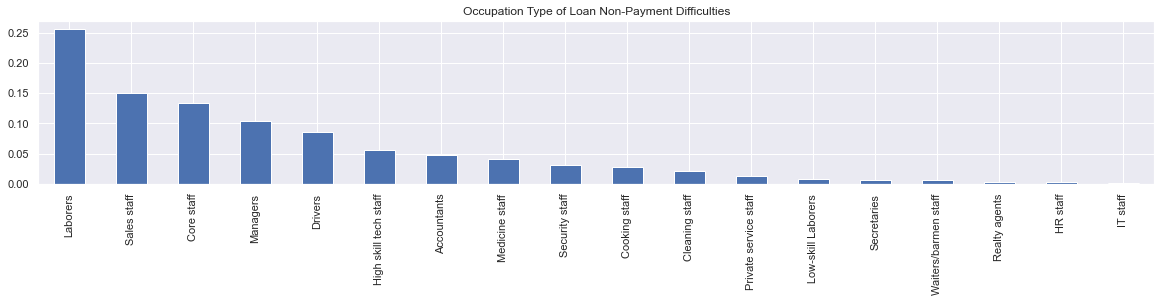

In [259]:
plt.figure(figsize=(20, 3))
plt.title("Occupation Type of Loan Non-Payment Difficulties")
ax= df_0['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We observe laborers percentage is high in both cases but laborors percentage is increased in case of defaulters 

In [168]:
## Univariate Analysis of Ordered Categorical Variable

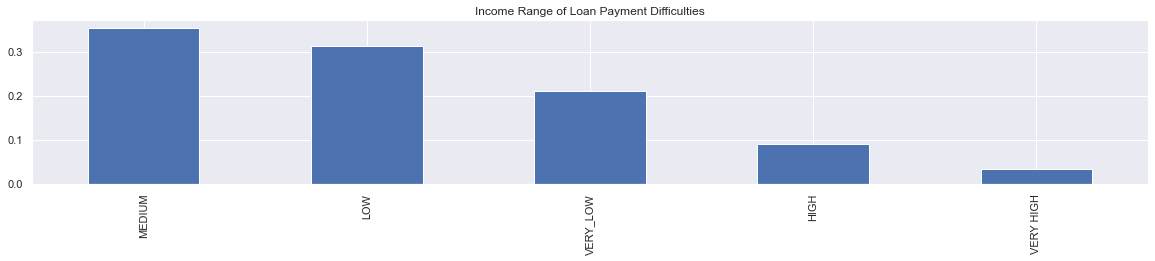

In [260]:
plt.figure(figsize=(20, 3))
plt.title("Income Range of Loan Payment Difficulties")
ax= df_1['AMT_INCOME_RANGE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

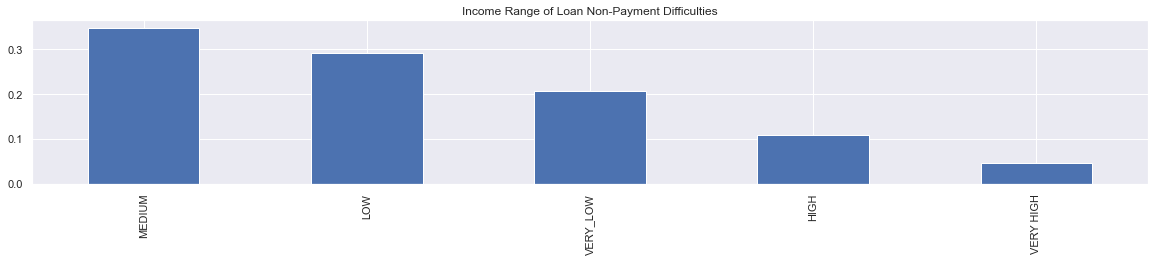

In [261]:
plt.figure(figsize=(20, 3))
plt.title("Income Range of Loan Non-Payment Difficulties")
ax= df_0['AMT_INCOME_RANGE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties

In [171]:
#Amount of Loan Credit

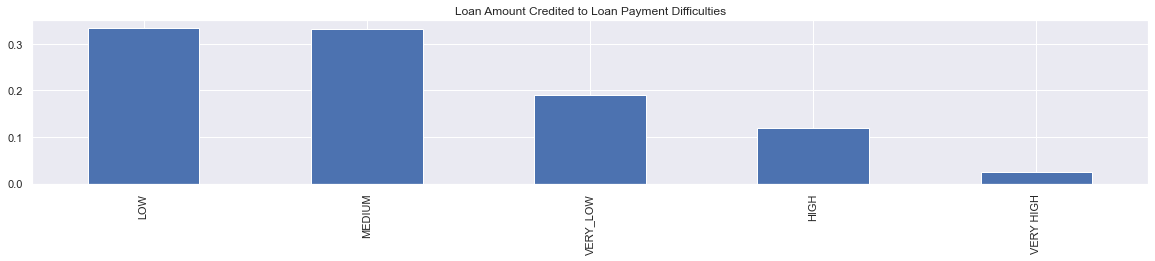

In [262]:
plt.figure(figsize=(20, 3))
plt.title("Loan Amount Credited to Loan Payment Difficulties")
ax= df_1['AMT_CREDIT_RANGE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

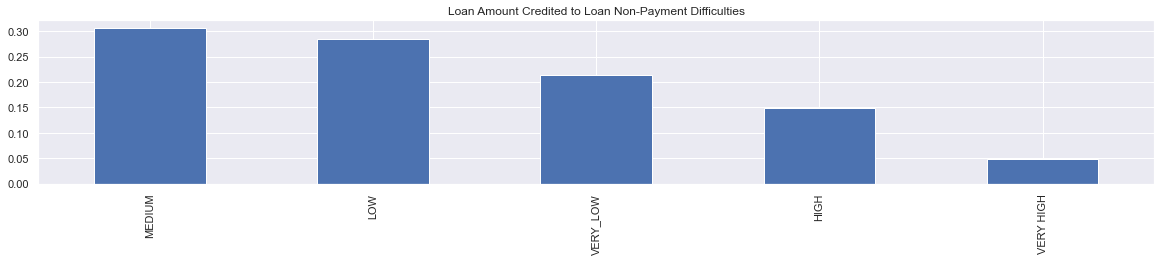

In [263]:
plt.figure(figsize=(20, 3))
plt.title("Loan Amount Credited to Loan Non-Payment Difficulties")
ax= df_0['AMT_CREDIT_RANGE'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### We observe that more defaulters are there who are credited with low amount

## Bivariate Analysis

In [175]:
#Numerical to Numerical Analysis

In [176]:
#PairPlot for Loan Payment Difficulties

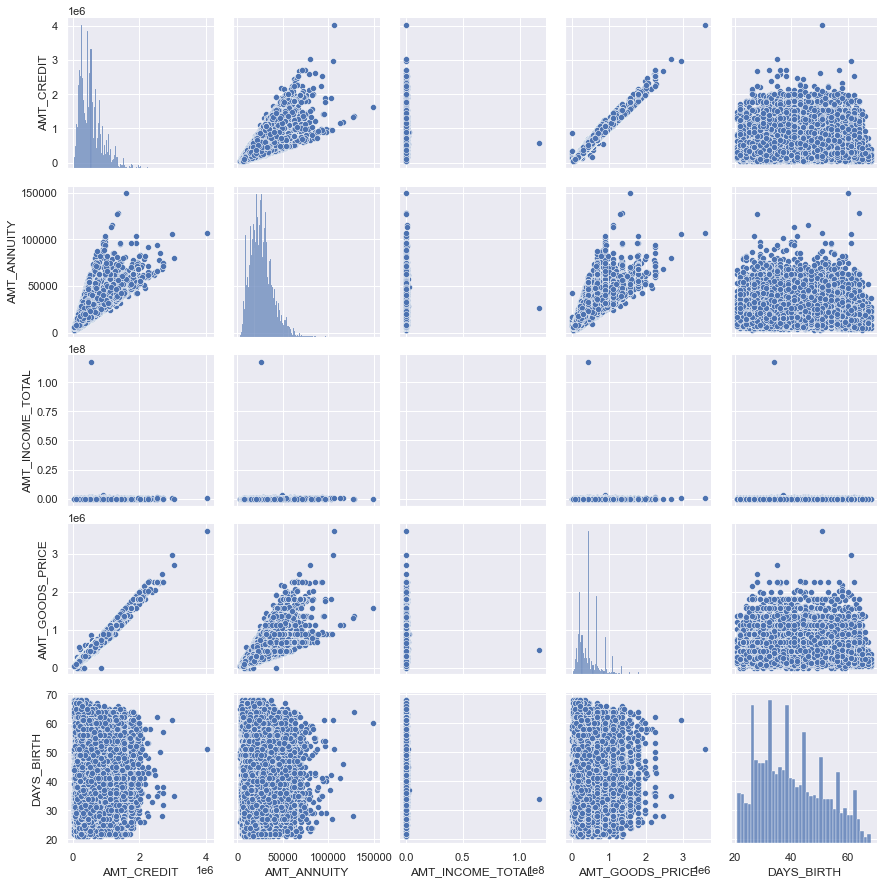

In [264]:

pair= df_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

In [178]:
#PairPlot for Loan Non-Payment Difficulties

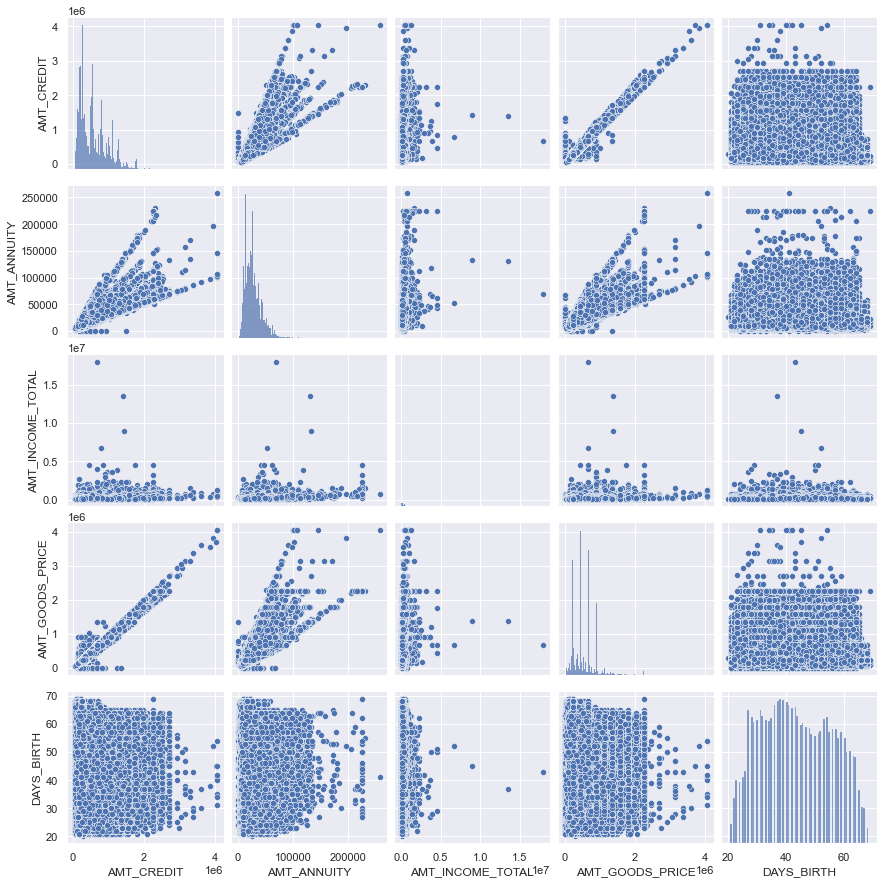

In [265]:
pair= df_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

####  We can observe linear graph only between Amount Credit and Amount Goods Price and Amount Credit and Amount Annuity rest cant make any observations as such

In [180]:
# Numerical vs Categorical

In [181]:
#INCOME VS EDUCATION

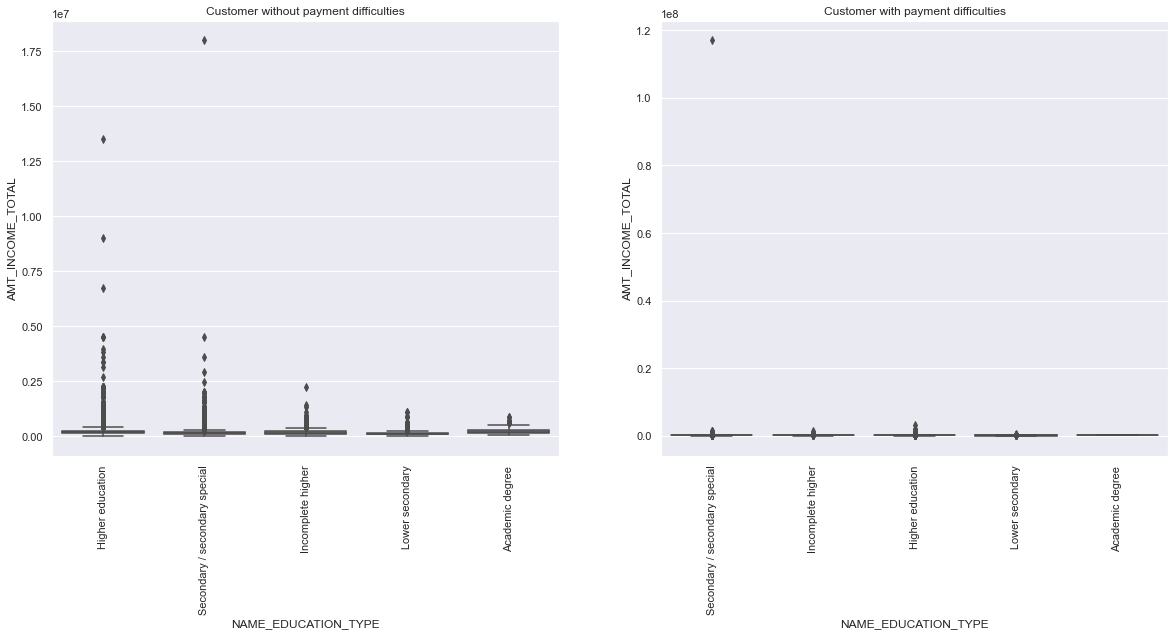

In [267]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_0,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_1,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [183]:
#Education type vs Amount Credit

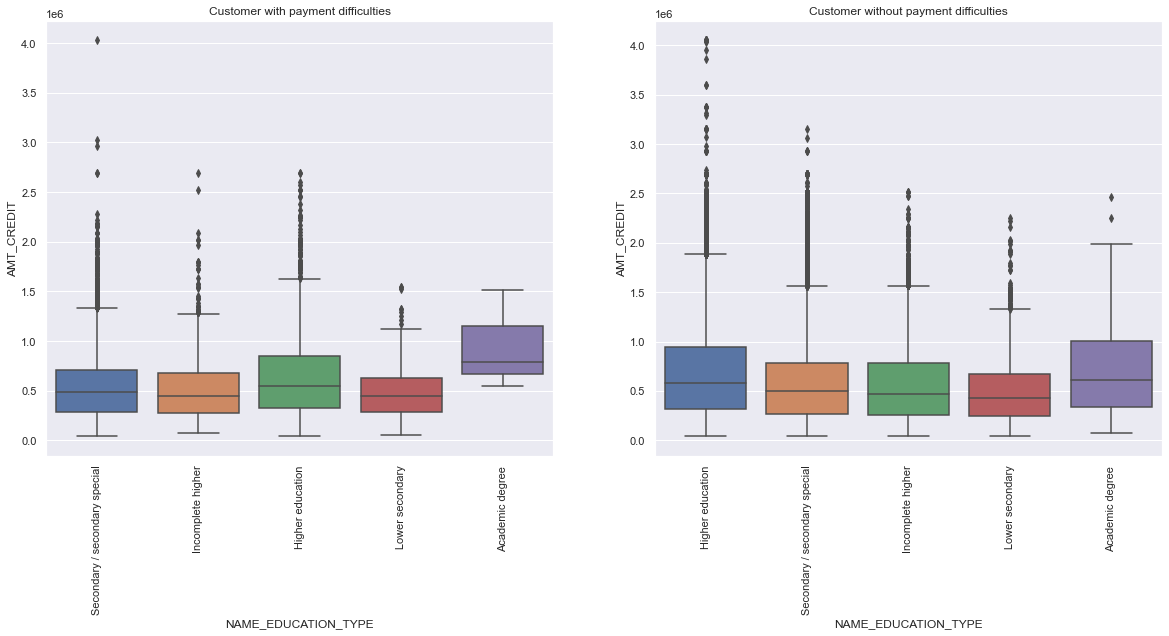

In [268]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### Here we can see that the range of customers without payment difficulties of Academic degree is higher than the customer of with payment. And the rest of the Education type is almost same for both the cases

In [185]:
#Income Range vs Amount Credit

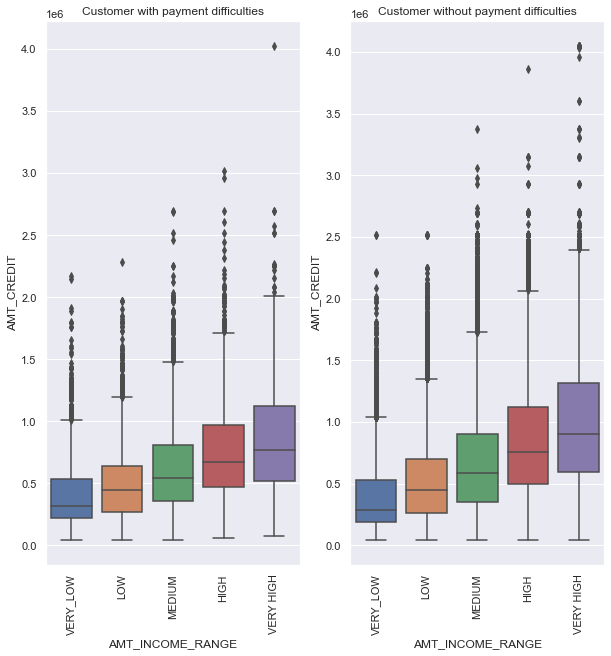

In [281]:
plt.figure(figsize=(10,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_1,y='AMT_CREDIT',x='AMT_INCOME_RANGE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_0,y='AMT_CREDIT',x='AMT_INCOME_RANGE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.show()

#### The Customers in high income range are credited large amount and there percentage is high as defaulters

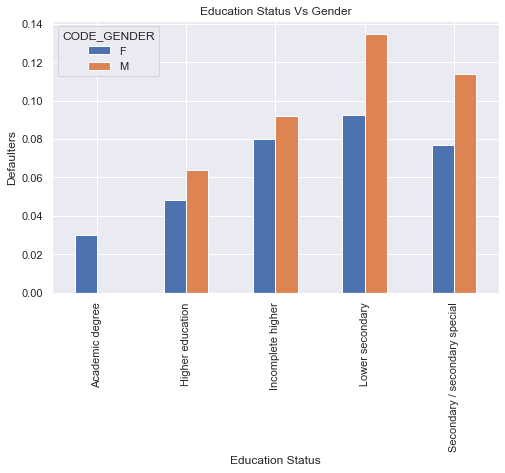

In [283]:
df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('Defaulters')
plt.title('Education Status Vs Gender')
plt.show()

#### Male with lower secondary education are more defaulted followed by Seconday/secondary special education.

In [285]:
#Bivariate - cat 
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

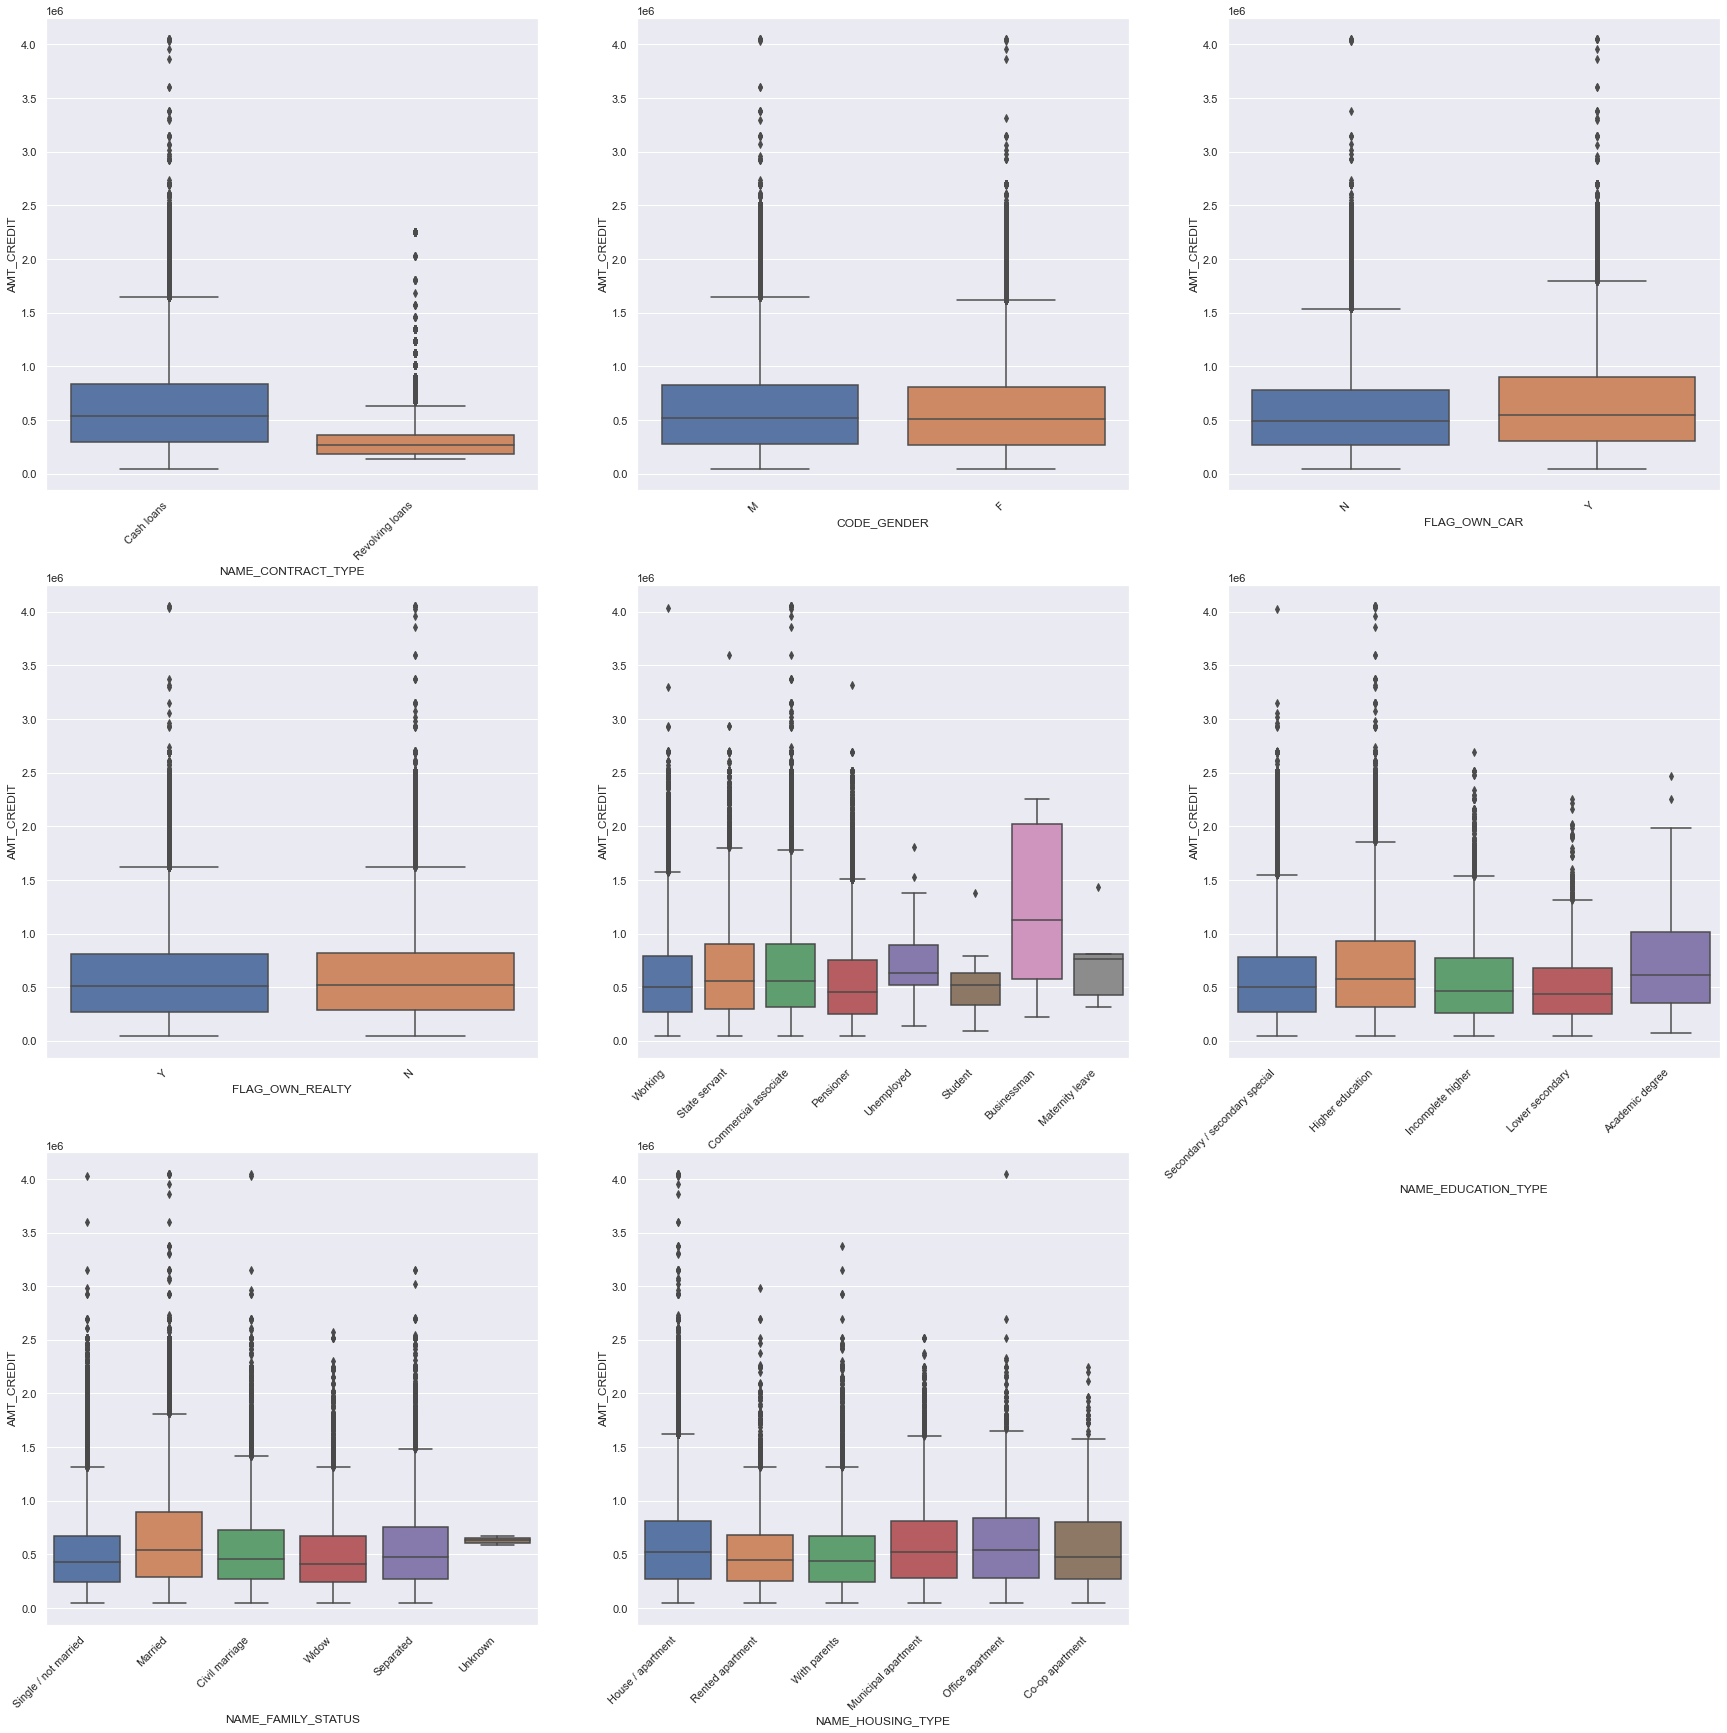

In [286]:
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Married people got more number of loans Clients who are living in municipal apartment, got more number of loans Higher education got more loans


# Correlation

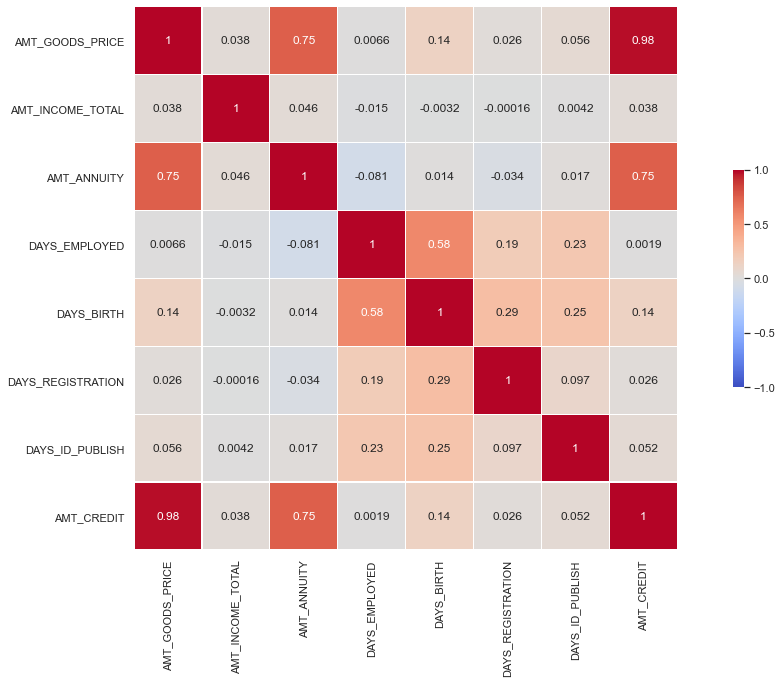

In [233]:
##Heatmap Heatmap for Loan Payment Difficulties
corr_matrix=df_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')



heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

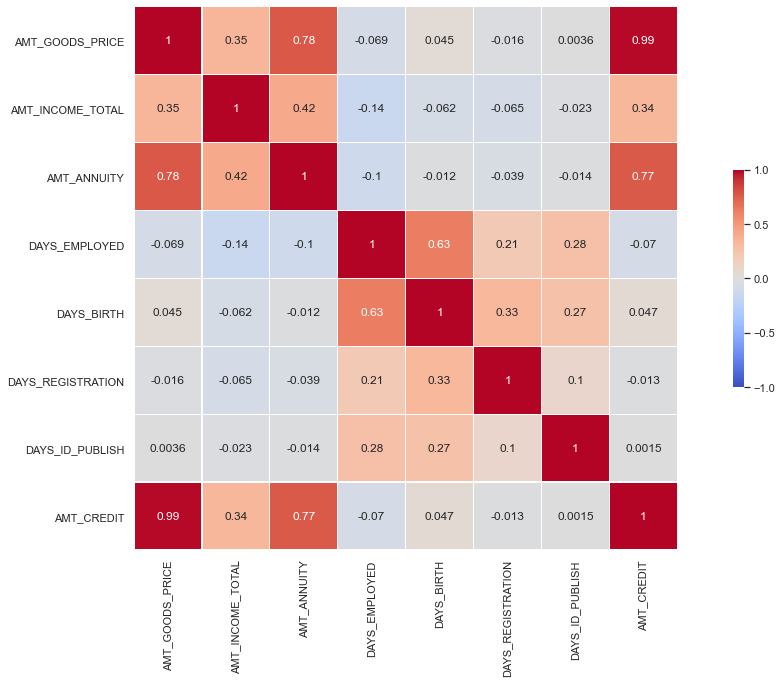

In [234]:
##Heatmap Heatmap for Loan Non-Payment Difficulties
corr_matrix=df_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')



heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#### We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

In [273]:
corr=df_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [274]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [275]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135603,0.135603
60,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070


#### The above dataframe shows top 10 correlation for clients with payment difficulties

In [325]:
corr=df_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [326]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [327]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.987250,0.987250
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.776686,0.776686
58,AMT_CREDIT,AMT_ANNUITY,0.771309,0.771309
35,DAYS_BIRTH,DAYS_EMPLOYED,0.626028,0.626028
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349462,0.349462
57,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
44,DAYS_REGISTRATION,DAYS_BIRTH,0.333025,0.333025
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.270804,0.270804


#### The above dataframe shows top 10 correlation for clients with Non -Payment difficulties

In [ ]:
#Load the previous application data set

In [287]:
prev_data = pd.read_csv('previous_application.csv')

In [288]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [290]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [291]:
#merging the application and previous data in one data frame
all_data_df = pd.merge(left=df, right=prev_data,how='inner', on='SK_ID_CURR',suffixes='_x')


In [292]:
all_data_df.shape

(1413701, 112)

In [293]:
df.shape

(307511, 76)

In [294]:
prev_data.shape

(1670214, 37)

In [295]:
all_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [196]:
#percentage of each type of contract

In [297]:

Contract_Type = prev_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [298]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/prev_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,NAME_CONTRACT_TYPE,Percentage_of_Values
0,Cash loans,44.76
1,Consumer loans,43.66
2,Revolving loans,11.57
3,XNA,0.02


#### Days of approval - WEEKDAY_APPR_PROCESS_START

In [300]:

Approval_days = prev_data['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [301]:
#find the percentage of contract status 
df_4=round((Approval_days.value_counts()/prev_data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
df_4 = pd.DataFrame(df_4)
df_4.reset_index(level=0, inplace=True)
df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_4

,WEEKDAY_APPR_PROCESS_START,Percentage_of_Values
0,TUESDAY,15.27
1,WEDNESDAY,15.27
2,MONDAY,15.18
3,FRIDAY,15.09
4,THURSDAY,14.91
5,SATURDAY,14.41
6,SUNDAY,9.86


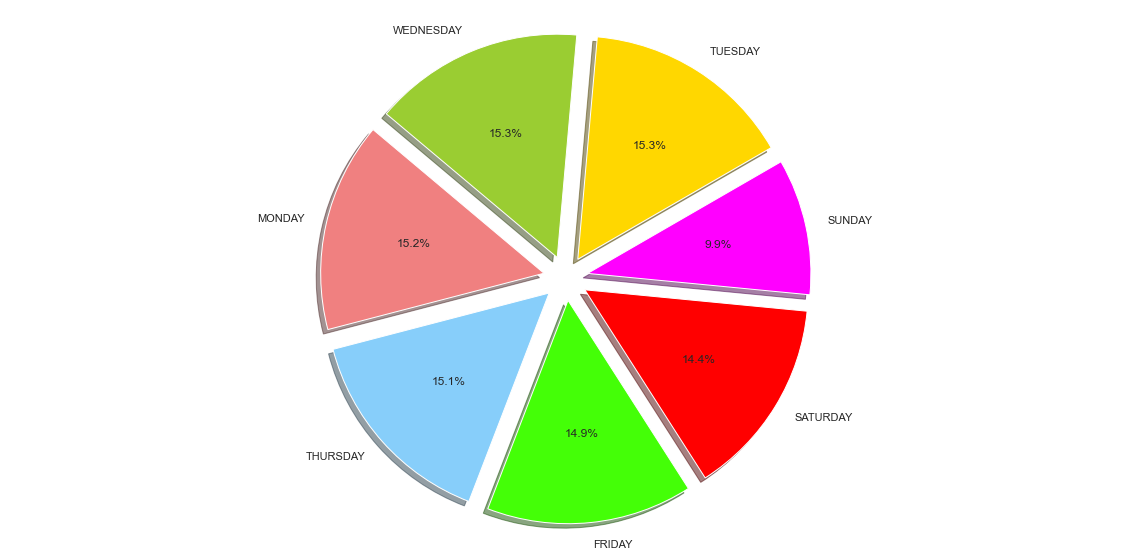

In [302]:
# Data to plot
labels = 'TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY' , 'FRIDAY' , 'SATURDAY' , 'SUNDAY' 
sizes = df_4['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , '#44FF07' ,'Red','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)

plt.axis('equal')
plt.show()

#### Most of the clients have opted to apply loan on Tuesday Rather than weekends

In [304]:
prev_data.NAME_CASH_LOAN_PURPOSE

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [305]:
Loan_Purpose = prev_data['NAME_CASH_LOAN_PURPOSE']
Loan_Purpose

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [306]:
#find the percentage of Loan Purpose
df_5=round((Loan_Purpose.value_counts()/prev_data["NAME_CASH_LOAN_PURPOSE"].count())*100,2)
df_5 = pd.DataFrame(df_5)
df_5.reset_index(level=0, inplace=True)
df_5.rename(columns=  {"index": "NAME_CASH_LOAN_PURPOSE", 
                     "NAME_CASH_LOAN_PURPOSE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_5.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_5

,NAME_CASH_LOAN_PURPOSE,Percentage_of_Values
0,XAP,55.24
1,XNA,40.59
2,Repairs,1.42
3,Other,0.93
4,Urgent needs,0.50
5,Buying a used car,0.17
6,Building a house or an annex,0.16
7,Everyday expenses,0.14
8,Medicine,0.13
9,Payments on other loans,0.12


[Text(0, 0, 'XAP'),
 Text(1, 0, 'XNA'),
 Text(2, 0, 'Repairs'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Urgent needs'),
 Text(5, 0, 'Buying a used car'),
 Text(6, 0, 'Building a house or an annex'),
 Text(7, 0, 'Everyday expenses'),
 Text(8, 0, 'Medicine'),
 Text(9, 0, 'Payments on other loans'),
 Text(10, 0, 'Education'),
 Text(11, 0, 'Journey'),
 Text(12, 0, 'Wedding / gift / holiday'),
 Text(13, 0, 'Purchase of electronic equipment'),
 Text(14, 0, 'Buying a new car'),
 Text(15, 0, 'Buying a home'),
 Text(16, 0, 'Car repairs'),
 Text(17, 0, 'Furniture'),
 Text(18, 0, 'Buying a holiday home / land'),
 Text(19, 0, 'Business development'),
 Text(20, 0, 'Gasification / water supply'),
 Text(21, 0, 'Buying a garage'),
 Text(22, 0, 'Hobby'),
 Text(23, 0, 'Money for a third person'),
 Text(24, 0, 'Refusal to name the goal')]

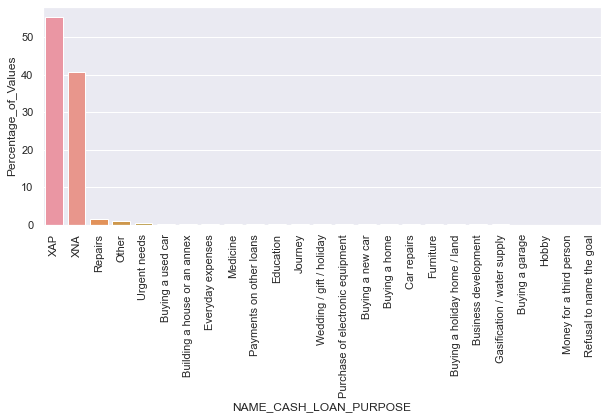

In [307]:
    f, ax = plt.subplots(figsize=(10,4))
plot_2=sns.barplot("NAME_CASH_LOAN_PURPOSE","Percentage_of_Values",data=df_5)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

#### Most Loan purpose was not recorded. XAP and XNA values are highest.

In [308]:
Payment_Type = prev_data['NAME_PAYMENT_TYPE']
#find the percentage of Payment Type
df_6=round((Payment_Type.value_counts()/prev_data["NAME_PAYMENT_TYPE"].count())*100,2)
df_6 = pd.DataFrame(df_6)
df_6.reset_index(level=0, inplace=True)
df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_6

,NAME_PAYMENT_TYPE,Percentage_of_Values
0,Cash through the bank,61.88
1,XNA,37.56
2,Non-cash from your account,0.49
3,Cashless from the account of the employer,0.06


[Text(0, 0, 'Cash through the bank'),
 Text(1, 0, 'XNA'),
 Text(2, 0, 'Non-cash from your account'),
 Text(3, 0, 'Cashless from the account of the employer')]

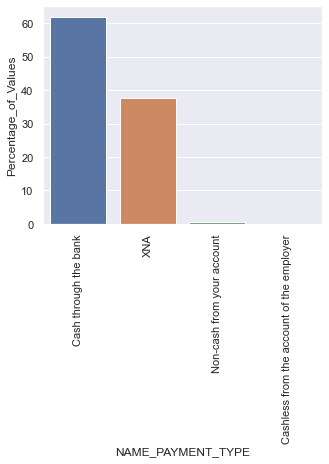

In [309]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_PAYMENT_TYPE","Percentage_of_Values",data=df_6)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

#### Most people preferred CASH(62.44%) as the mode of Payment

In [311]:
Code_Rejection = prev_data['CODE_REJECT_REASON']
#find the percentage of Payment Type
df_7=round((Code_Rejection.value_counts()/prev_data["CODE_REJECT_REASON"].count())*100,2)
df_7 = pd.DataFrame(df_7)
df_7.reset_index(level=0, inplace=True)
df_7.rename(columns=  {"index": "CODE_REJECT_REASON", 
                     "CODE_REJECT_REASON":"Percentage_of_Values"}, 
                                 inplace = True) 
df_7.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_7

,CODE_REJECT_REASON,Percentage_of_Values
0,XAP,81.01
1,HC,10.49
2,LIMIT,3.33
3,SCO,2.24
4,CLIENT,1.58
5,SCOFR,0.77
6,XNA,0.31
7,VERIF,0.21
8,SYSTEM,0.04


[Text(0, 0, 'XAP'),
 Text(1, 0, 'HC'),
 Text(2, 0, 'LIMIT'),
 Text(3, 0, 'SCO'),
 Text(4, 0, 'CLIENT'),
 Text(5, 0, 'SCOFR'),
 Text(6, 0, 'XNA'),
 Text(7, 0, 'VERIF'),
 Text(8, 0, 'SYSTEM')]

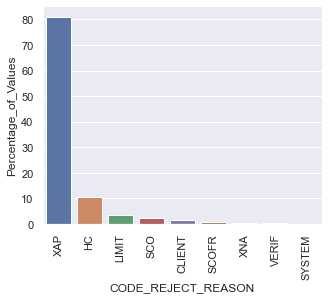

In [312]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CODE_REJECT_REASON","Percentage_of_Values",data=df_7)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

#### Primary reason for the Loan to get rejected is not recorded(XAP (81%)) followed by HC.

In [313]:
Goods_Category= prev_data['NAME_GOODS_CATEGORY']
#find the percentage of Goods Client applied for
df_8=round((Goods_Category.value_counts()/prev_data["NAME_GOODS_CATEGORY"].count())*100,2)
df_8 = pd.DataFrame(df_8)
df_8.reset_index(level=0, inplace=True)
df_8.rename(columns=  {"index": "NAME_GOODS_CATEGORY", 
                     "NAME_GOODS_CATEGORY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_8.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_8

,NAME_GOODS_CATEGORY,Percentage_of_Values
0,XNA,56.93
1,Mobile,13.45
2,Consumer Electronics,7.28
3,Computers,6.33
4,Audio/Video,5.95
5,Furniture,3.21
6,Photo / Cinema Equipment,1.50
7,Construction Materials,1.50
8,Clothing and Accessories,1.41
9,Auto Accessories,0.44


[Text(0, 0, 'XNA'),
 Text(1, 0, 'Mobile'),
 Text(2, 0, 'Consumer Electronics'),
 Text(3, 0, 'Computers'),
 Text(4, 0, 'Audio/Video'),
 Text(5, 0, 'Furniture'),
 Text(6, 0, 'Photo / Cinema Equipment'),
 Text(7, 0, 'Construction Materials'),
 Text(8, 0, 'Clothing and Accessories'),
 Text(9, 0, 'Auto Accessories'),
 Text(10, 0, 'Jewelry'),
 Text(11, 0, 'Homewares'),
 Text(12, 0, 'Medical Supplies'),
 Text(13, 0, 'Vehicles'),
 Text(14, 0, 'Sport and Leisure'),
 Text(15, 0, 'Gardening'),
 Text(16, 0, 'Other'),
 Text(17, 0, 'Office Appliances'),
 Text(18, 0, 'Tourism'),
 Text(19, 0, 'Medicine'),
 Text(20, 0, 'Direct Sales'),
 Text(21, 0, 'Fitness'),
 Text(22, 0, 'Additional Service'),
 Text(23, 0, 'Education'),
 Text(24, 0, 'Weapon'),
 Text(25, 0, 'Insurance'),
 Text(26, 0, 'House Construction'),
 Text(27, 0, 'Animals')]

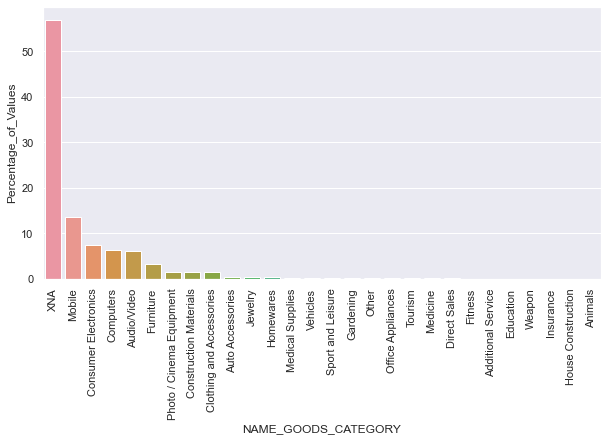

In [314]:
f, ax = plt.subplots(figsize=(10,5))
plot_2=sns.barplot("NAME_GOODS_CATEGORY","Percentage_of_Values",data=df_8)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

In [315]:
  Insurance= prev_data['NFLAG_LAST_APPL_IN_DAY']
#find the percentage of Client requested Insurance
df_15=round((Insurance.value_counts()/prev_data["NFLAG_LAST_APPL_IN_DAY"].count())*100,2)
df_15 = pd.DataFrame(df_15)
df_15.reset_index(level=0, inplace=True)
df_15.rename(columns=  {"index": "INSURANCE_FLAG", 
                     "NFLAG_LAST_APPL_IN_DAY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_15.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_15

,INSURANCE_FLAG,Percentage_of_Values
0,1,99.65
1,0,0.35


[Text(0, 0, '0'), Text(1, 0, '1')]

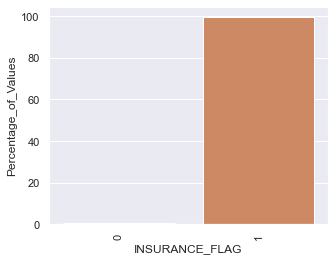

In [316]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("INSURANCE_FLAG","Percentage_of_Values",data=df_15)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

#### For most clients it was the last application of the day.

### Merge Data Analysis

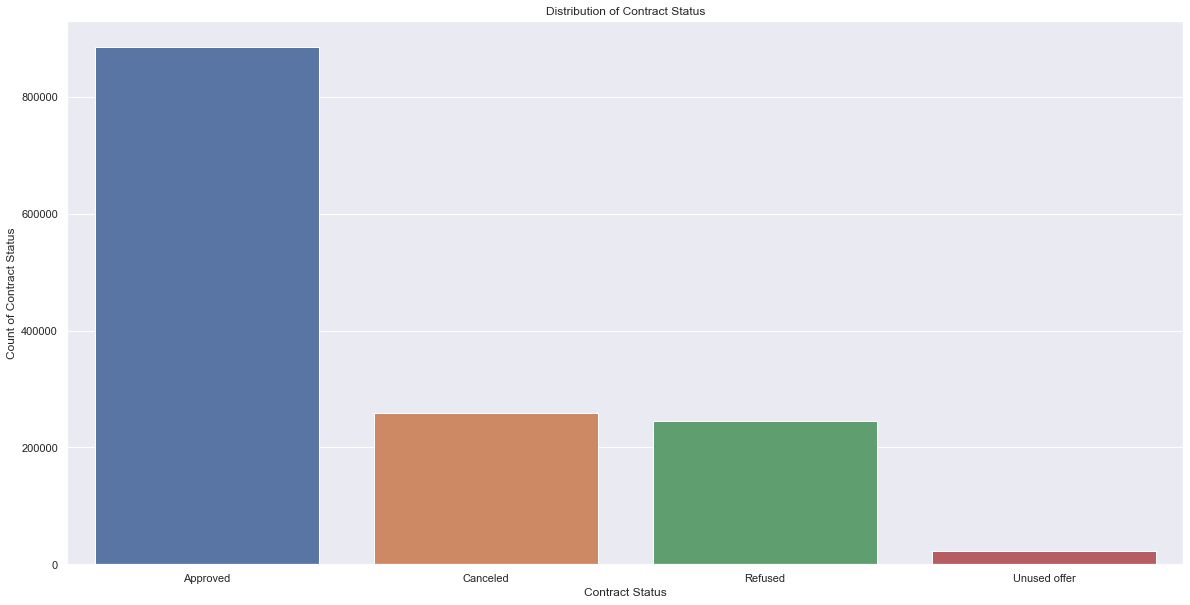

In [318]:
sns.countplot(all_data_df['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [319]:
Client_Type = all_data_df['NAME_CLIENT_TYPE']
Client_Type

0                New
1           Repeater
2          Refreshed
3          Refreshed
4                New
             ...    
1413696     Repeater
1413697     Repeater
1413698     Repeater
1413699     Repeater
1413700     Repeater
Name: NAME_CLIENT_TYPE, Length: 1413701, dtype: object

In [320]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/all_data_df["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

,NAME_CLIENT_TYPE,Percentage_of_Values
0,Repeater,73.40
1,New,18.36
2,Refreshed,8.13
3,XNA,0.11


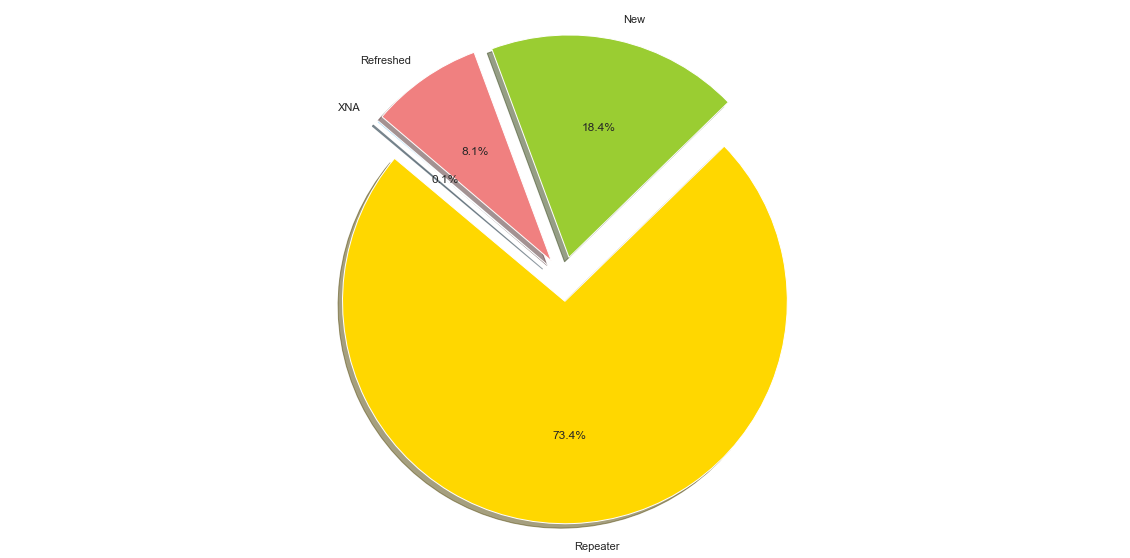

In [321]:
# Data to plot
labels = 'Repeater', 'New', 'Refreshed', 'XNA'
sizes = df_2['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### 73.2% applicants are repeaters. Only, 18.5% are new clients.

In [322]:
table = pd.pivot_table(all_data_df, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

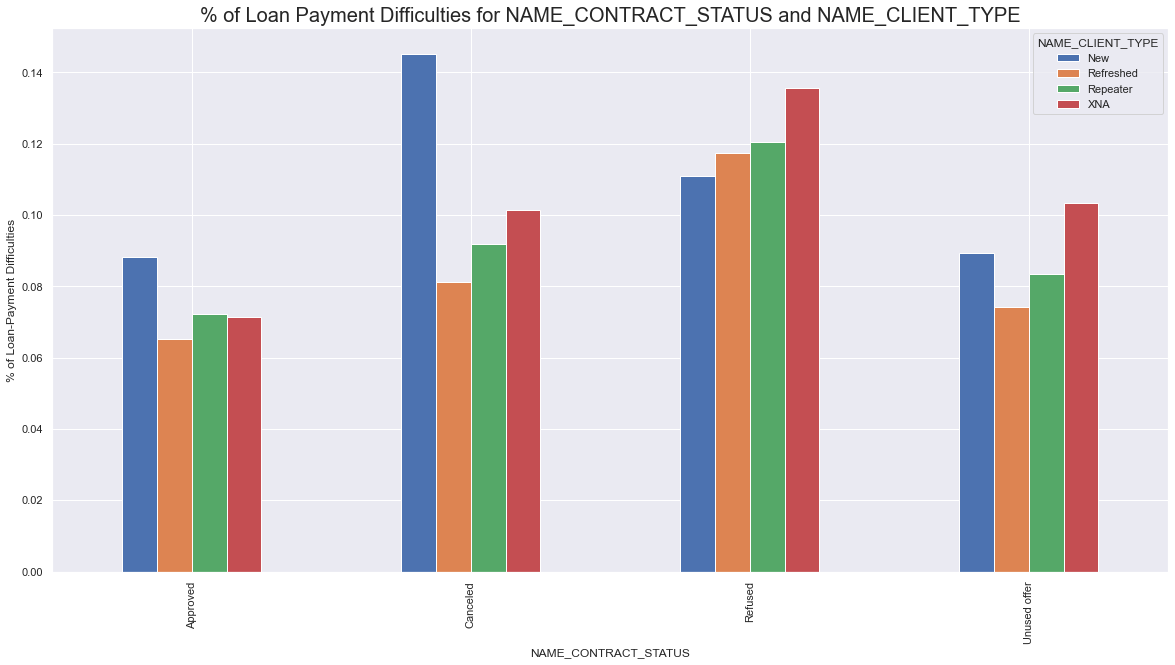

In [323]:
ax = table.T.plot(kind='bar')
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE', fontdict={'fontsize':20})
plt.show()

#### It can be observed from the above graph that Client who where 'New' and had 'Cancelled' previous application tend to have more % of Loan-Payment Difficulties in current application